In [1]:
import plotly.express as px
import pandas as pd

In [85]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")
df

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [5]:
west = ["AZ", "CO", "NE", "NM", "AL", "UT", "ID", "MT", "WY", "CA", "WA", "OR", "AL"]
# Create a new column named "Region"
df['Region'] = df['State'].apply(lambda x: 'West' if x in west else 'East')

In [7]:
df.groupby(["Region", "Severity"])["ID"].count()

Region  Severity
East    1             12182
        2           1479537
        3            114568
        4            102745
West    1             13871
        2           1053454
        3             40537
        4             28448
Name: ID, dtype: int64

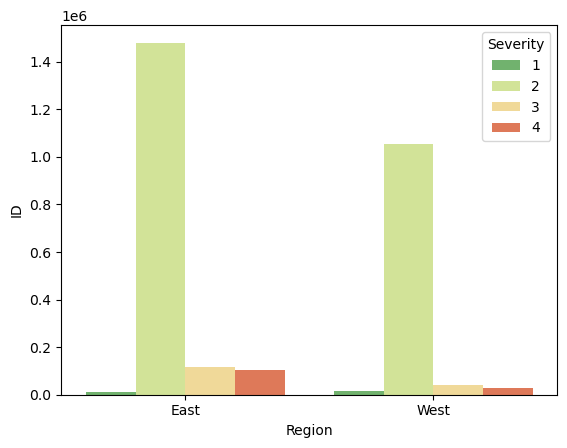

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby("Region")["ID"].count()
d = df.groupby(["Region", "Severity"])["ID"].count()
d = pd.DataFrame(d).reset_index()
d
sns.barplot(data = d, x = "Region", y = "ID", hue = "Severity", palette = "RdYlGn_r")
plt.savefig('severity_region.png', dpi=300, bbox_inches='tight')



In [9]:
df['Temperature(C)'] = df.apply(lambda x: (5/9)*x['Temperature(F)']-32,axis=1)

In [15]:
import seaborn as sns 
sns.set_palette(sns.color_palette("coolwarm"))

In [16]:
df.drop('Number', axis=1, inplace = True)

In [17]:
missing = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing = missing.loc[missing >= 0.8]
missing

Precipitation(in)    19.310789
Wind_Chill(F)        16.505678
Wind_Speed(mph)       5.550967
Wind_Direction        2.592834
Humidity(%)           2.568830
Weather_Condition     2.482514
Visibility(mi)        2.479350
Temperature(F)        2.434646
Temperature(C)        2.434646
Pressure(in)          2.080593
Weather_Timestamp     1.783125
dtype: float64

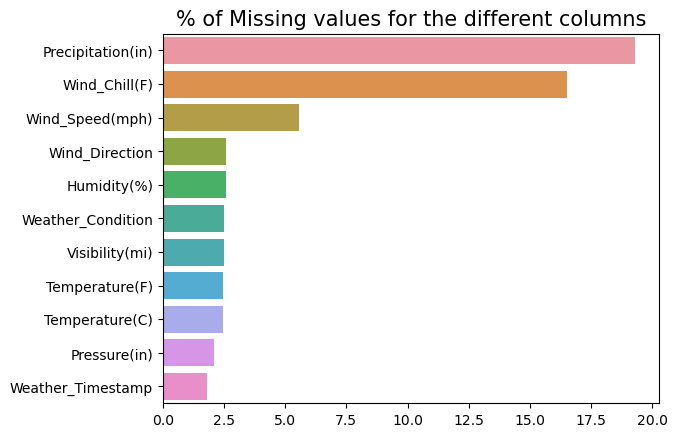

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
sns.barplot(x = missing.values, y = missing.index, orient = "h")
plt.title("% of Missing values for the different columns", fontsize = 15)
plt.show()
plt.savefig("missingvalues.png",  dpi=150)


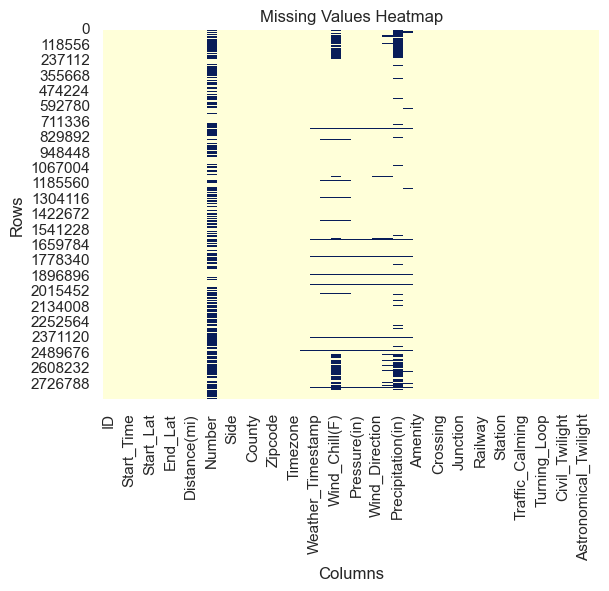

<Figure size 640x480 with 0 Axes>

In [112]:
# Create a heatmap of missing values using seaborn
missing = df.isna()
sns.heatmap(missing, cmap='YlGnBu', cbar=False)

# Set plot properties using matplotlib
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Display the plot
plt.show()
plt.savefig('heatmp.png', dpi=600)

In [71]:
df["End_Time"] = pd.to_datetime(df["End_Time"])
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

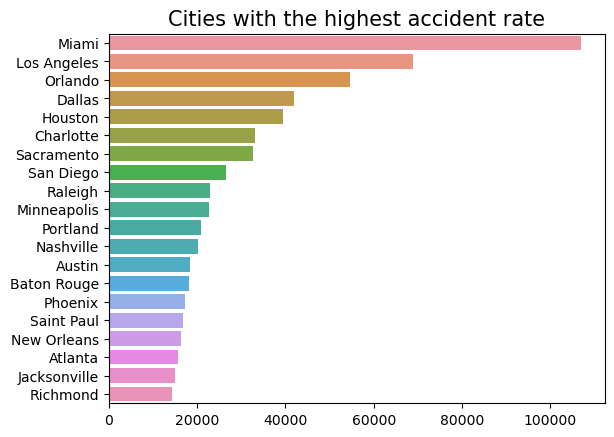

In [20]:
#let's plot the top cities with the highest accidents
import numpy as np
sns.barplot(x = df.City.value_counts()[:20].values, y = df.City.value_counts()[:20].index, orient = "h")
plt.title("Cities with the highest accident rate", fontsize = 15)
plt.show()

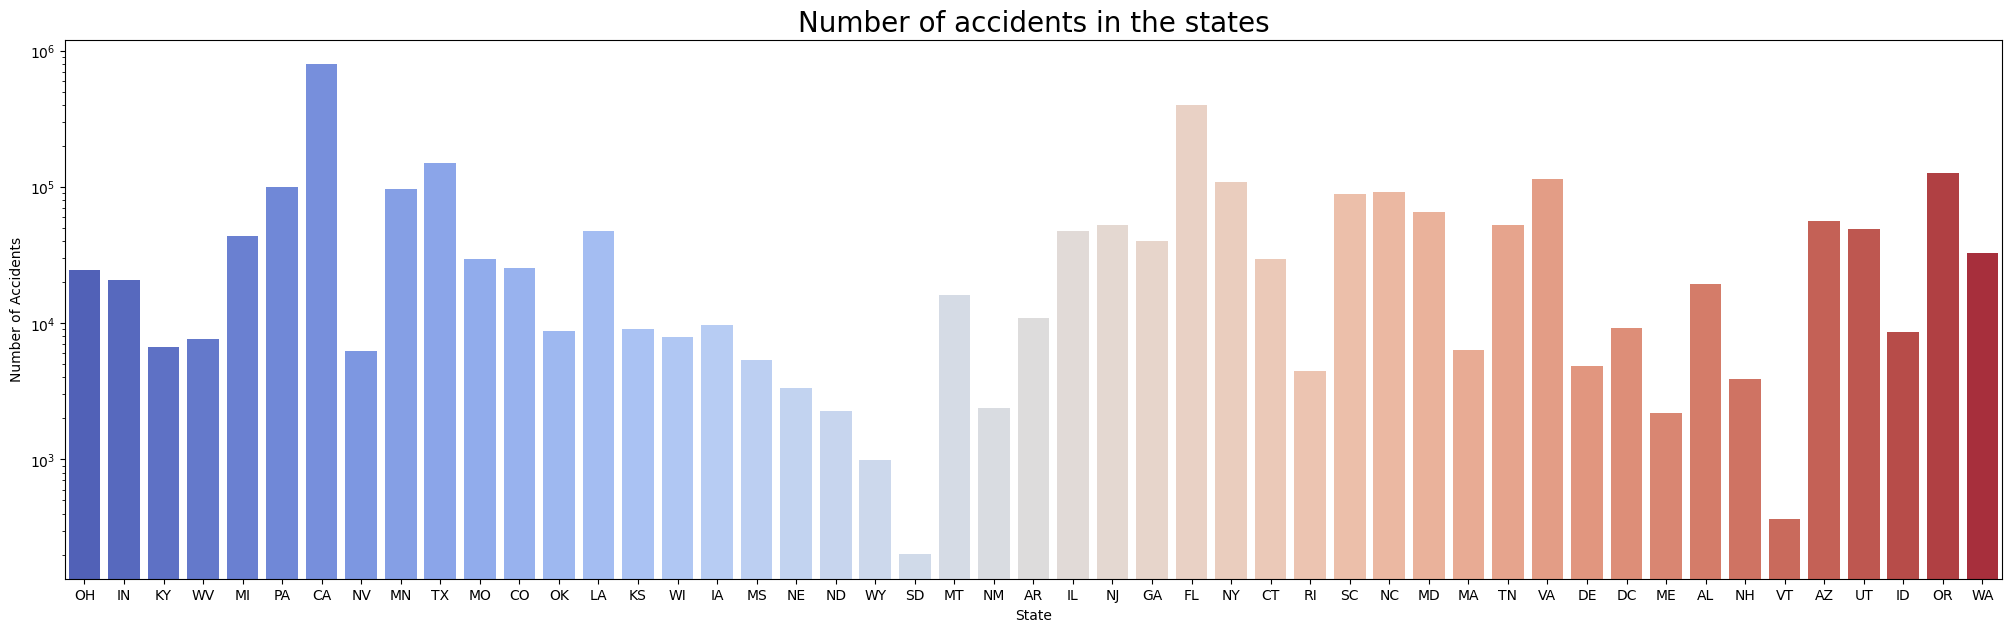

In [21]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=df, palette = "coolwarm")
plt.yscale("log")
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title("Number of accidents in the states",fontsize=20)
plt.show()

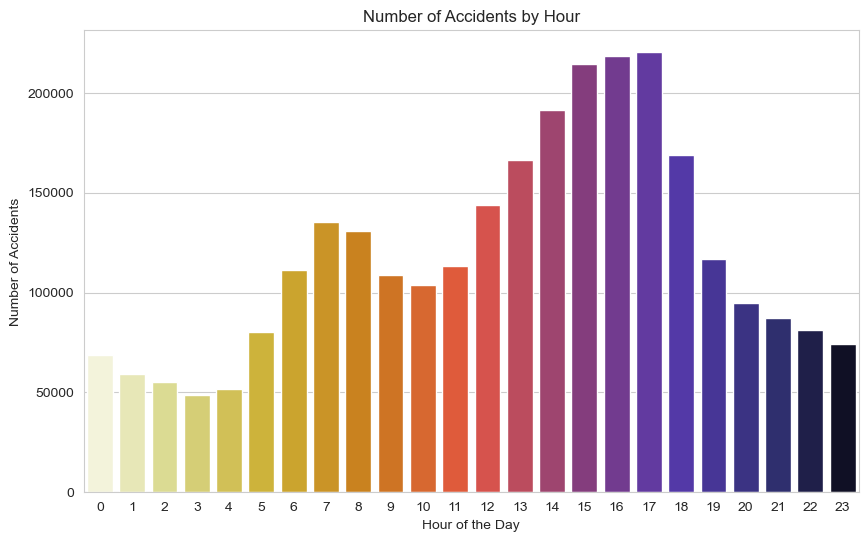

In [22]:
# Group the data by the hour of the accident and count the number of accidents
hourly_accidents = df.groupby(df['Start_Time'].dt.hour).size()

# Create a barplot of the number of accidents by hour using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette = "CMRmap_r")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour')
plt.show()

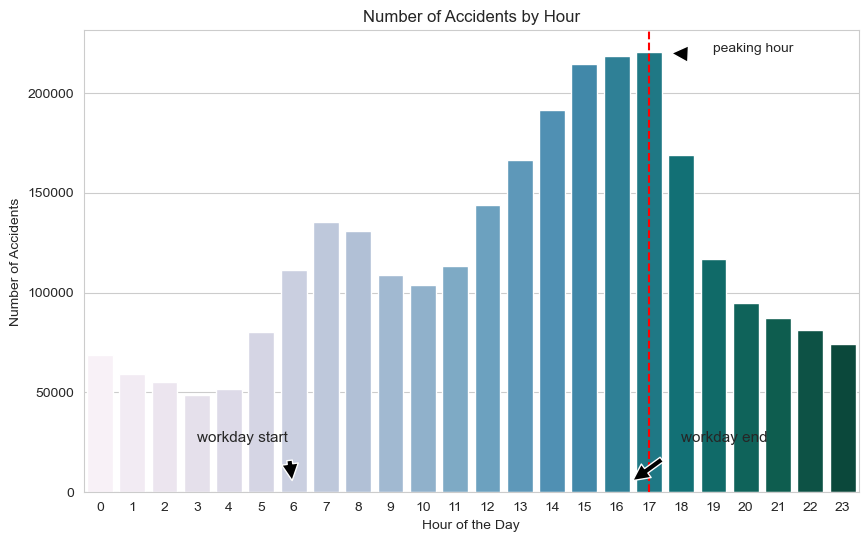

In [23]:

# Identify the hours with the highest number of accidents
highest_hours = hourly_accidents.loc[hourly_accidents == hourly_accidents.max()].index

# Create a barplot of the number of accidents by hour using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette = "PuBuGn")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour')

# Highlight the hours with the highest number of accidents using red color
for i in highest_hours:
    plt.axvline(x = i, color='red', linestyle='--')
    
# Add label arrows pointing at the hours of maximum danger
for j in highest_hours:
    plt.annotate('peaking hour', xy=(j, hourly_accidents[j]), xytext=(j+2, hourly_accidents[j]+80), 
                 arrowprops=dict(facecolor='black', shrink=0.35))
    
plt.annotate('workday start',xy=(6,0),xytext=(3,25000),arrowprops= dict(facecolor='black', shrink=0.25), fontsize=11)
plt.annotate('workday end',xy=(16,0),xytext=(18,25000),arrowprops=dict(facecolor='black', shrink=0.25), fontsize=11)


plt.show()

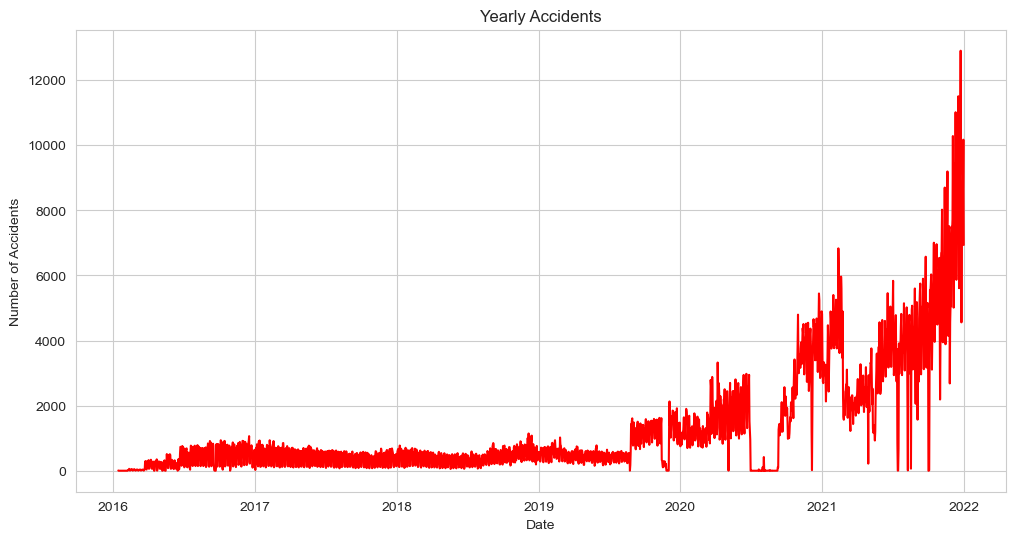

In [24]:

# Group the data by start date and count the number of accidents in each group
daily_accidents = df.groupby(pd.Grouper(key='Start_Time', freq='D')).size()

# Create a line plot of the daily accidents
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_accidents.index, daily_accidents.values, color='r')
ax.set_title('Yearly Accidents')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.show()

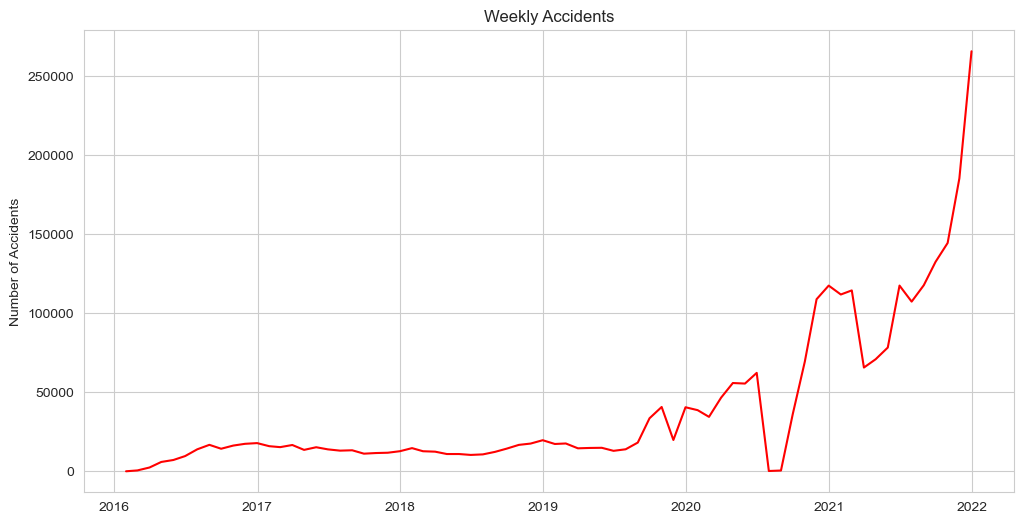

In [25]:

# Group the data by start date and count the number of accidents in each group
weekly_accidents = df.groupby(pd.Grouper(key='Start_Time', freq='M')).size()

# Create a line plot of the daily accidents
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(weekly_accidents.index, weekly_accidents.values, color='r')
ax.set_title('Weekly Accidents')
#ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.show()

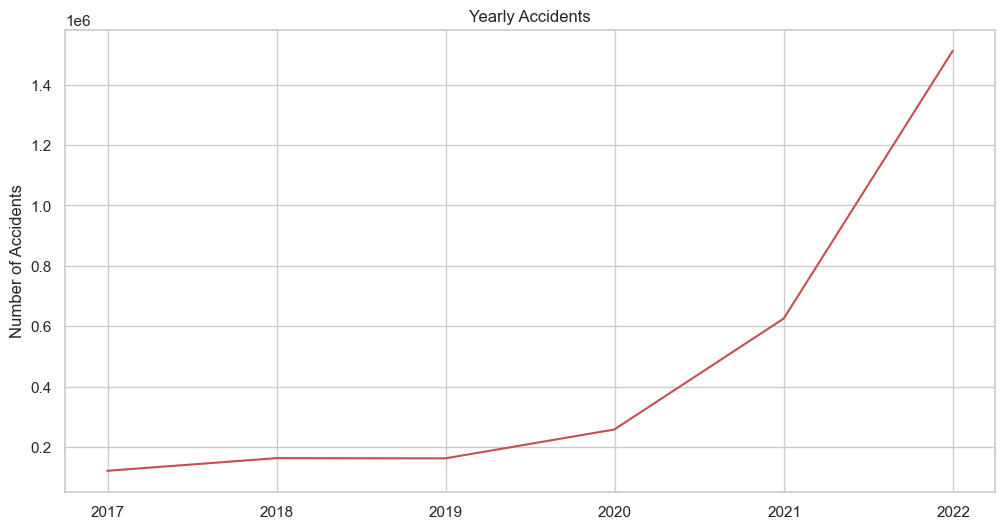

In [113]:
# Group the data by start date and count the number of accidents in each group
yearly_accidents = df.groupby(pd.Grouper(key='Start_Time', freq='Y')).size()

# Create a line plot of the daily accidents
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(yearly_accidents.index, yearly_accidents.values, color='r')
ax.set_title('Yearly Accidents')
#ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.show()

In [27]:
year_max_acc = df.Start_Time.dt.year.value_counts()
year_max_acc

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Accidents')

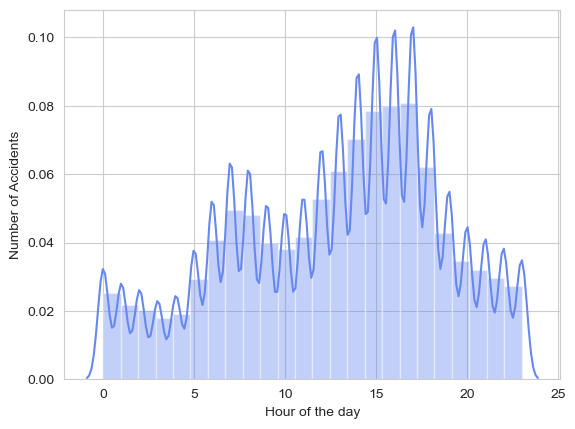

In [28]:
#overall hours with more accidents density 

sns.distplot(df.Start_Time.dt.hour,bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Accidents')

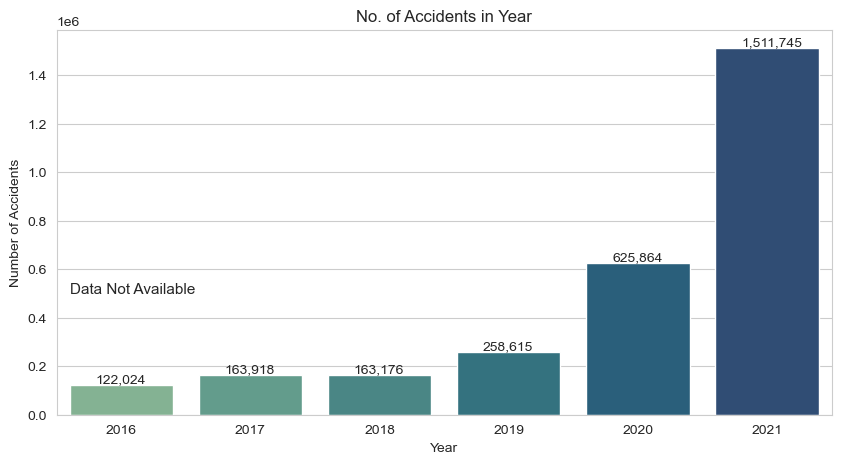

In [29]:
df['Year'] = df['Start_Time'].dt.year



fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.ylabel('Number of Accidents')
plt.show()


KeyError: 0

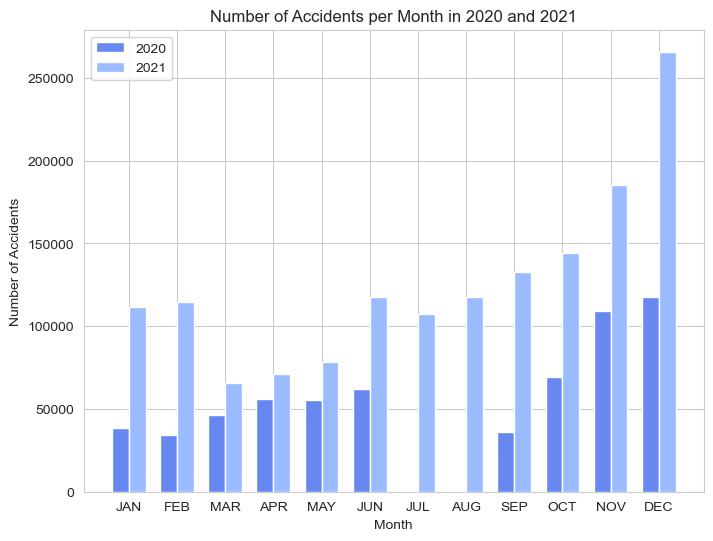

In [59]:
import numpy as np

# Filter the data to include only accidents that occurred in 2020 and 2021
df_2020 = df.loc[df['Start_Time'].dt.year == 2020]
df_2021 = df.loc[df['Start_Time'].dt.year == 2021]

# Group the data by month and count the number of accidents in each month for each year
accidents_per_month_2020 = df_2020.groupby(df_2020['Start_Time'].dt.month)['ID'].count()
accidents_per_month_2021 = df_2021.groupby(df_2021['Start_Time'].dt.month)['ID'].count()

# Set the x-axis labels
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
x = np.arange(len(months))

# Set the width of each bar
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bars for 2020 and 2021
rects1 = ax.bar(x - width/2, accidents_per_month_2020, width, label='2020')
rects2 = ax.bar(x + width/2, accidents_per_month_2021, width, label='2021')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Month')
ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Accidents per Month in 2020 and 2021')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# Add the counts above the two bar graphs
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height + 50,
            f"{accidents_per_month_2020[i]}",
            ha='center', va='bottom')
    
for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height + 50,
            f"{accidents_per_month_2021[i]}",
            ha='center', va='bottom')

plt.show()

In [60]:
df.Sunrise_Sunset.dropna(inplace = True)

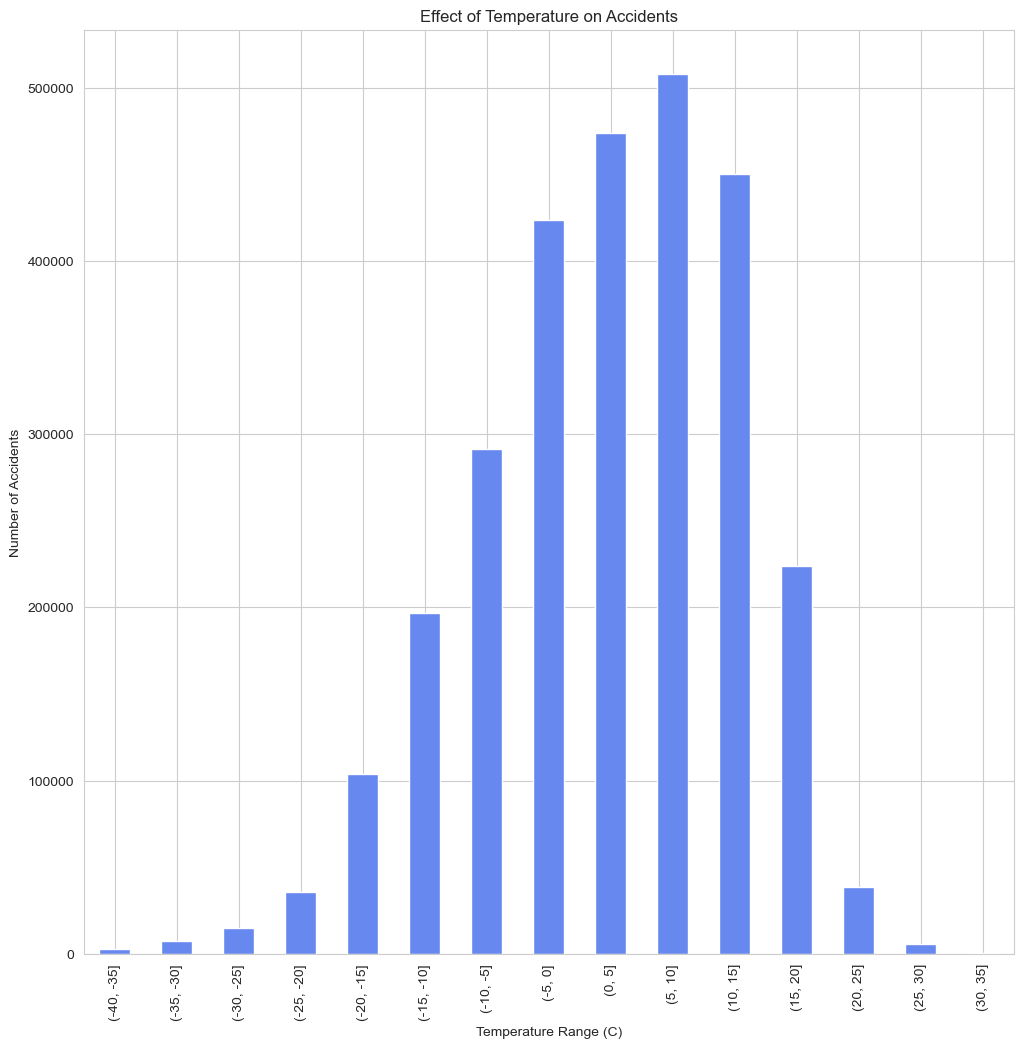

In [34]:
# group the data by temperature range
bins = pd.cut(df['Temperature(C)'], bins=range(-40, 40, 5))
grouped = df.groupby(bins)

# count the number of accidents in each temperature range
counts = grouped.size()

# plot the results
plt.figure(figsize = (12,12))
counts.plot(kind='bar')
                            
    
#plt.xticks(rotation = 0)
plt.xlabel('Temperature Range (C)')
plt.ylabel('Number of Accidents')
plt.title('Effect of Temperature on Accidents')
plt.show()

In [41]:
df.groupby("Sunrise_Sunset").size().reset_index(name="accident_count")

Sunrise_Sunset  accident_count
0            Day         1811935
1          Night         1030540

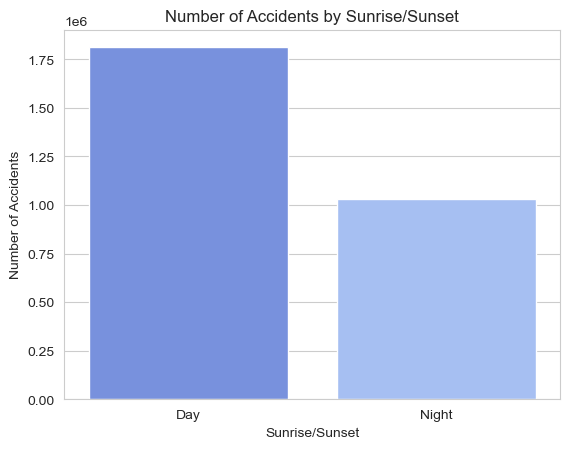

In [42]:
sunrise_sunset_counts = df.groupby("Sunrise_Sunset").size().reset_index(name="accident_count")

# create a bar plot
sns.barplot(x="Sunrise_Sunset", y="accident_count", data=sunrise_sunset_counts)
plt.title("Number of Accidents by Sunrise/Sunset")
plt.xlabel("Sunrise/Sunset")
plt.ylabel("Number of Accidents")
plt.show()

In [44]:
df['Temperature(C)'].value_counts().sort_values()

 23.055556        1
-38.722222        1
-32.833333        1
 61.777778        1
-33.333333        1
              ...  
 5.777778     58557
 8.000000     59681
 9.666667     60534
 10.777778    63575
 8.555556     64505
Name: Temperature(C), Length: 788, dtype: int64

In [122]:
df.iloc[:, 20:30]

Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0        2016-02-08 00:53:00            42.1           36.1         58.0   
1        2016-02-08 05:58:00            36.9            NaN         91.0   
2        2016-02-08 05:53:00            36.0            NaN         97.0   
3        2016-02-08 06:54:00            39.0            NaN         55.0   
4        2016-02-08 07:53:00            37.0           29.8         93.0   
...                      ...             ...            ...          ...   
2845337  2019-08-23 17:53:00            86.0           86.0         40.0   
2845338  2019-08-23 18:53:00            70.0           70.0         73.0   
2845339  2019-08-23 18:53:00            73.0           73.0         64.0   
2845340  2019-08-23 18:51:00            71.0           71.0         81.0   
2845341  2019-08-23 20:50:00            79.0           79.0         47.0   

         Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0               29.76            10.0             SW             10.4   
1               29.68            10.0           Calm              NaN   
2               29.70            10.0           Calm              NaN   
3               29.65            10.0           Calm              NaN   
4               29.69            10.0            WSW             10.4   
...               ...             ...            ...              ...   
2845337         28.92            10.0              W             13.0   
2845338         29.39            10.0             SW              6.0   
2845339         29.74            10.0            SSW             10.0   
2845340         29.62            10.0             SW              8.0   
2845341         28.63             7.0             SW              7.0   

         Precipitation(in) Weather_Condition  
0                     0.00        Light Rain  
1                     0.02        Light Rain  
2                     0.02          Overcast  
3                      NaN          Overcast  
4                     0.01        Light Rain  
...                    ...               ...  
2845337               0.00              Fair  
2845338               0.00              Fair  
2845339               0.00     Partly Cloudy  
2845340               0.00              Fair  
2845341               0.00              Fair  

[2845342 rows x 10 columns]

Text(-13.498234567901234, 0.5, 'Number of Accidents')

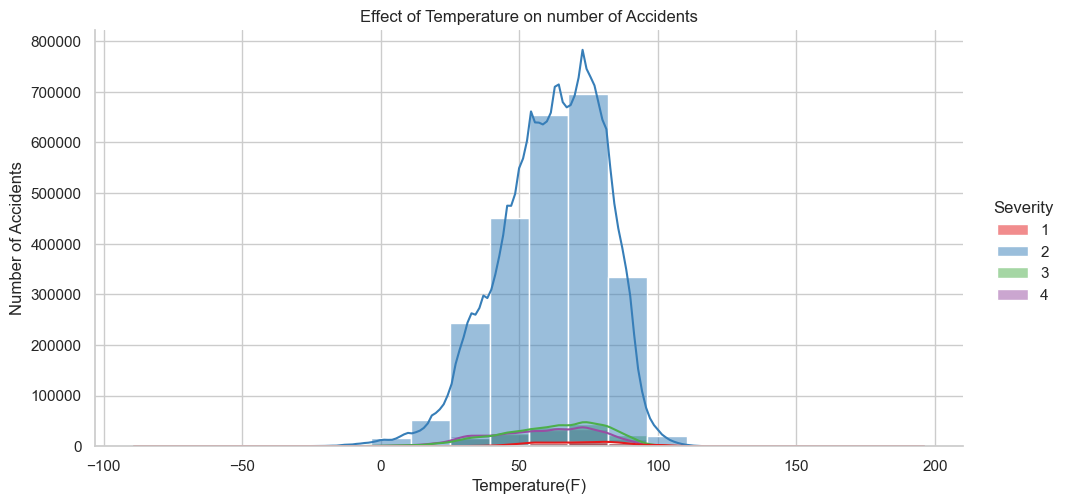

In [121]:
weather = df.iloc[:, 20:30]
weather['Severity'] = df['Severity']

sns.displot(weather, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);
plt.title("Effect of Temperature on number of Accidents")
plt.ylabel('Number of Accidents')

Text(-14.969188850308631, 0.5, 'Number of Accidents')

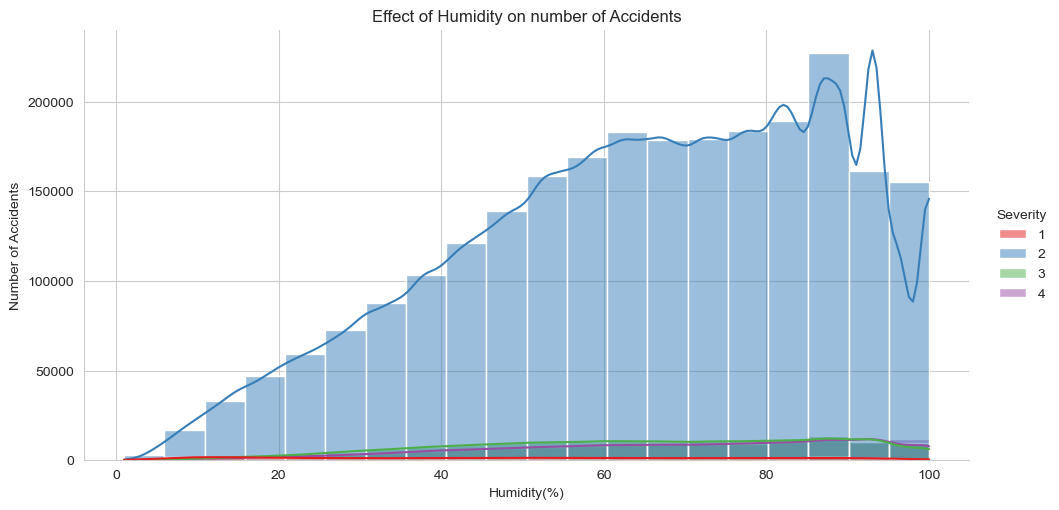

In [47]:
sns.displot(weather, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);
plt.title("Effect of Humidity on number of Accidents")
plt.ylabel('Number of Accidents')

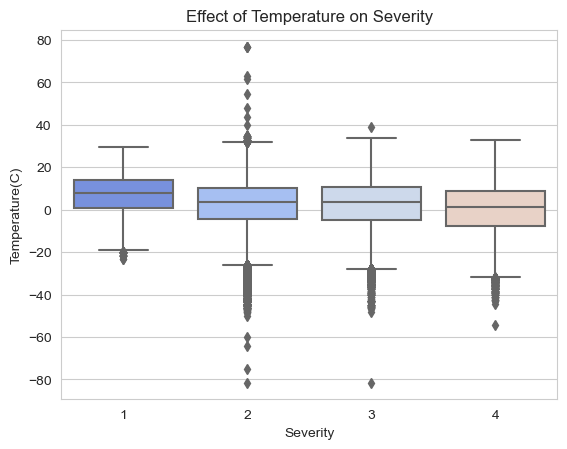

In [48]:
#sns.kdeplot(df.iloc[:,-1], hue = df["Severity"])
sns.boxplot(y = df.iloc[:,-2], x = df["Severity"])
plt.title('Effect of Temperature on Severity')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(C)'>

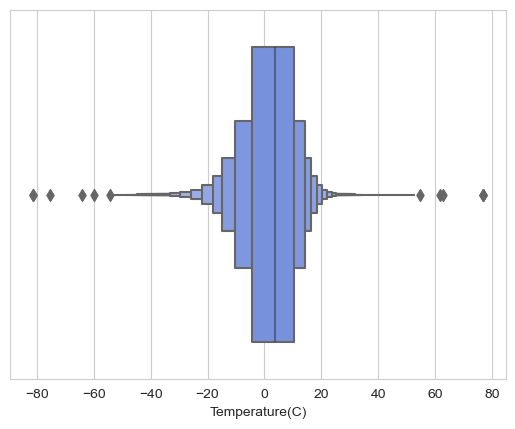

In [49]:
sns.boxenplot(df['Temperature(C)'])


In [50]:
temp = df["State"].value_counts()
temp.index

Index(['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC', 'MD', 'AZ',
       'NJ', 'TN', 'UT', 'LA', 'IL', 'MI', 'GA', 'WA', 'CT', 'MO', 'CO', 'OH',
       'IN', 'AL', 'MT', 'AR', 'IA', 'DC', 'KS', 'OK', 'ID', 'WI', 'WV', 'KY',
       'MA', 'NV', 'MS', 'DE', 'RI', 'NH', 'NE', 'NM', 'ND', 'ME', 'WY', 'VT',
       'SD'],
      dtype='object')

In [54]:
temp = df.groupby("State").Severity.value_counts()
temp = temp.unstack().sort_values(2, ascending = False)
temp.head()

Severity       1         2        3       4
State                                      
CA        5058.0  761462.0  20213.0  9135.0
FL        2800.0  377529.0  11478.0  9581.0
TX         941.0  124059.0  19570.0  4467.0
OR        1262.0  118529.0   2526.0  4024.0
VA        1507.0   99036.0   4421.0  8571.0

In [67]:
import pandas as pd

# Set "Start_Time" column as the index
df.set_index("Start_Time", inplace=True)

# Convert the index to a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Resample the time series to get the count of accidents by day
daily_counts = df.resample("D").size()

# Print the first 5 rows of the resulting time series
print(daily_counts.head())

Start_Time
2016-01-14    7
2016-01-15    0
2016-01-16    0
2016-01-17    0
2016-01-18    0
Freq: D, dtype: int64


In [68]:
df['Distance(mi)'].describe()


count    2.845342e+06
mean     7.026779e-01
std      1.560361e+00
min      0.000000e+00
25%      5.200000e-02
50%      2.440000e-01
75%      7.640000e-01
max      1.551860e+02
Name: Distance(mi), dtype: float64

In [99]:

import plotly.graph_objects as go

# Create a new DataFrame with the count of accidents by date
ts = df.groupby(pd.to_datetime(df.Start_Time).dt.date).size().reset_index(name='count')

# Create a line chart with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=ts['Start_Time'], y=ts['count'], mode='lines', name='Accidents'))
fig.update_layout(title='Accidents Over Time', xaxis_title='Date', yaxis_title='Number of Accidents')

fig.write_html("overtime_accidents.html")

fig.show()


In [ ]:
#pip install pandas.tools.plotting

In [74]:
import pandas as pd
import plotly.express as px

# Load the dataset

# Filter the dataset for Miami
miami_df = df[df['City'] == 'Miami']

# Group the data by latitude and longitude and count the number of accidents
grouped = miami_df.groupby(['Start_Lat', 'Start_Lng']).size().reset_index(name='count')

# Create a scatter_mapbox plot
fig = px.scatter_mapbox(grouped, lat="Start_Lat", lon="Start_Lng", size="count", color="count",
           color_discrete_sequence=px.colors.sequential.PuBuGn, zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.write_html("mi_accidents_map.html")

fig.show()

In [75]:
# get the numeric columns
numeric_cols = df.select_dtypes('number').columns
print(numeric_cols)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


<AxesSubplot:>

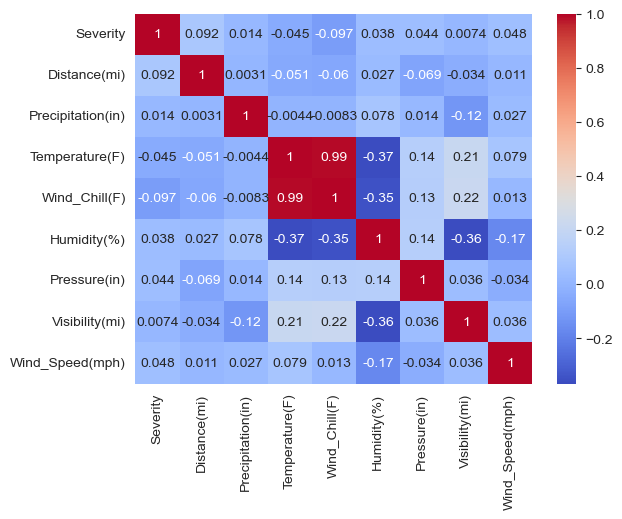

In [76]:
import seaborn as sns

corr_cols = ['Severity', 'Distance(mi)', 'Precipitation(in)','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [88]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["Start_Time"])


In [119]:
import plotly.graph_objects as go

fig = go.Figure()

# Add trace for each severity level
for i in df["Severity"].unique():
    temp = df[df["Severity"] == i].groupby(pd.Grouper(key = "Start_Time", freq='M')).size()
    fig.add_trace(go.Bar(x=temp.index, y=temp.values, name=f"Severity {i}", opacity=0.7))

# Set layout
fig.update_layout(title="Monthly Accidents by Severity Level",
                  xaxis_title="Date",
                  yaxis_title="Number of Accidents (log scale)",
                  yaxis_type="log",
                  barmode="stack")
fig.write_html("yearly_accidents_sev.html")

fig.show()

<AxesSubplot:title={'center':' Accidents reported for different Temperatures'}, xlabel='No. of accidents', ylabel='Temperature(F)'>

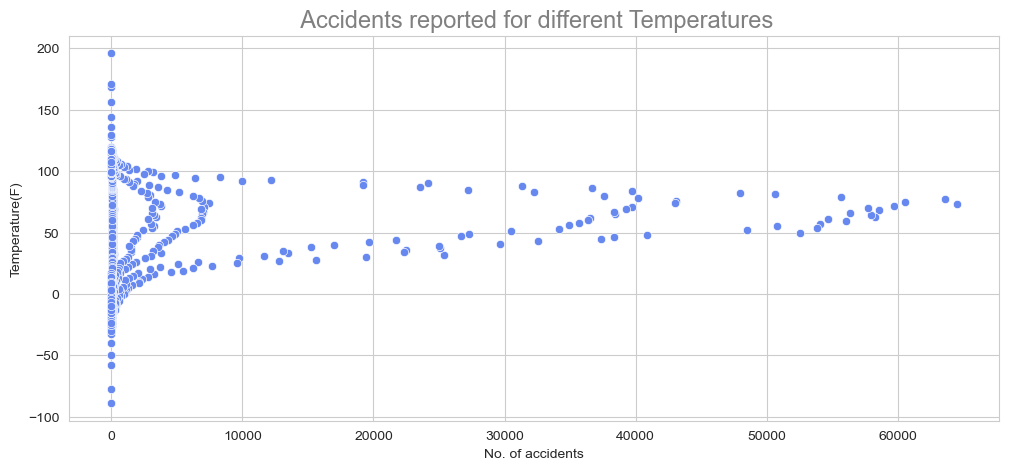

In [90]:
weather_cond=df["Temperature(F)"].value_counts()
weather_cond.sort_values().tail(10)

plt.figure(figsize=(12,5))
plt.title(" Accidents reported for different Temperatures",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot(y=weather_cond.index, x=weather_cond)

<AxesSubplot:title={'center':' Accidents reported for different humidity '}, xlabel='No. of accidents', ylabel='Humidity(%) '>

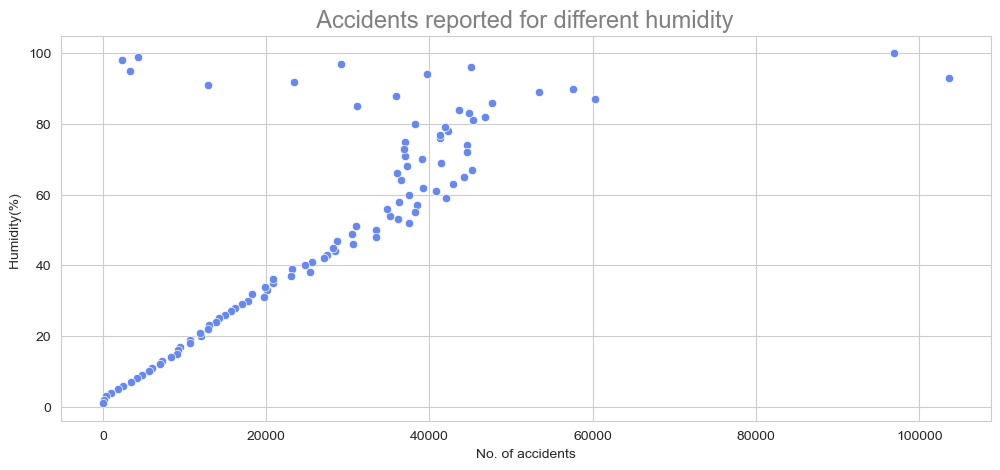

In [91]:
humidity_effect=df["Humidity(%)"].value_counts()
humidity_effect.sort_values().tail()

plt.figure(figsize=(12,5))
plt.title(" Accidents reported for different humidity ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Humidity(%) ')
sns.scatterplot(y=humidity_effect.index, x=humidity_effect)

<AxesSubplot:title={'center':' Accidents reported for different pressures '}, xlabel='No. of accidents', ylabel='Pressure(in)'>

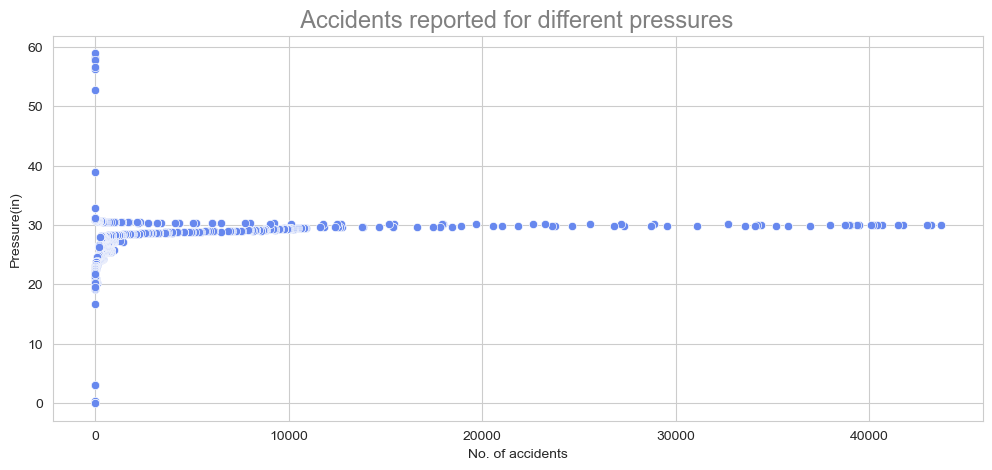

In [92]:
pressure_effect=df["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()


plt.figure(figsize=(12, 5))
plt.title(" Accidents reported for different pressures ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect)

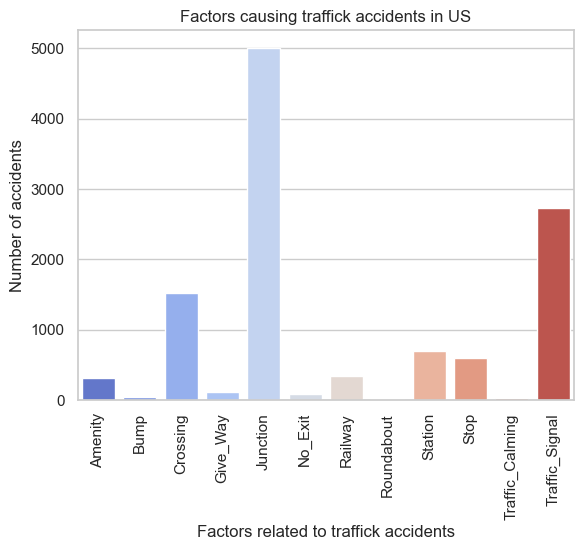

In [110]:
# Group the accidents by each boolean feature and count the number of accidents in each group
groups = df.groupby(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'])['ID'].count()

# Reshape the data so that each boolean feature is a column and the counts are the values
counts = groups.reset_index().melt(id_vars='ID', var_name='feature', value_name='is_true')

# Filter out rows where the boolean feature is False (i.e., is_true = 0)
counts = counts[counts['is_true'] == True]

# Plot a stacked bar chart of the counts for each boolean feature
plt.xticks(rotation = 90)
sns.barplot(x='feature', y='ID', data=counts, palette='coolwarm', ci = False)
plt.xlabel('Factors related to traffick accidents')
plt.ylabel('Number of accidents')
plt.title('Factors causing traffick accidents in US')


plt.show()

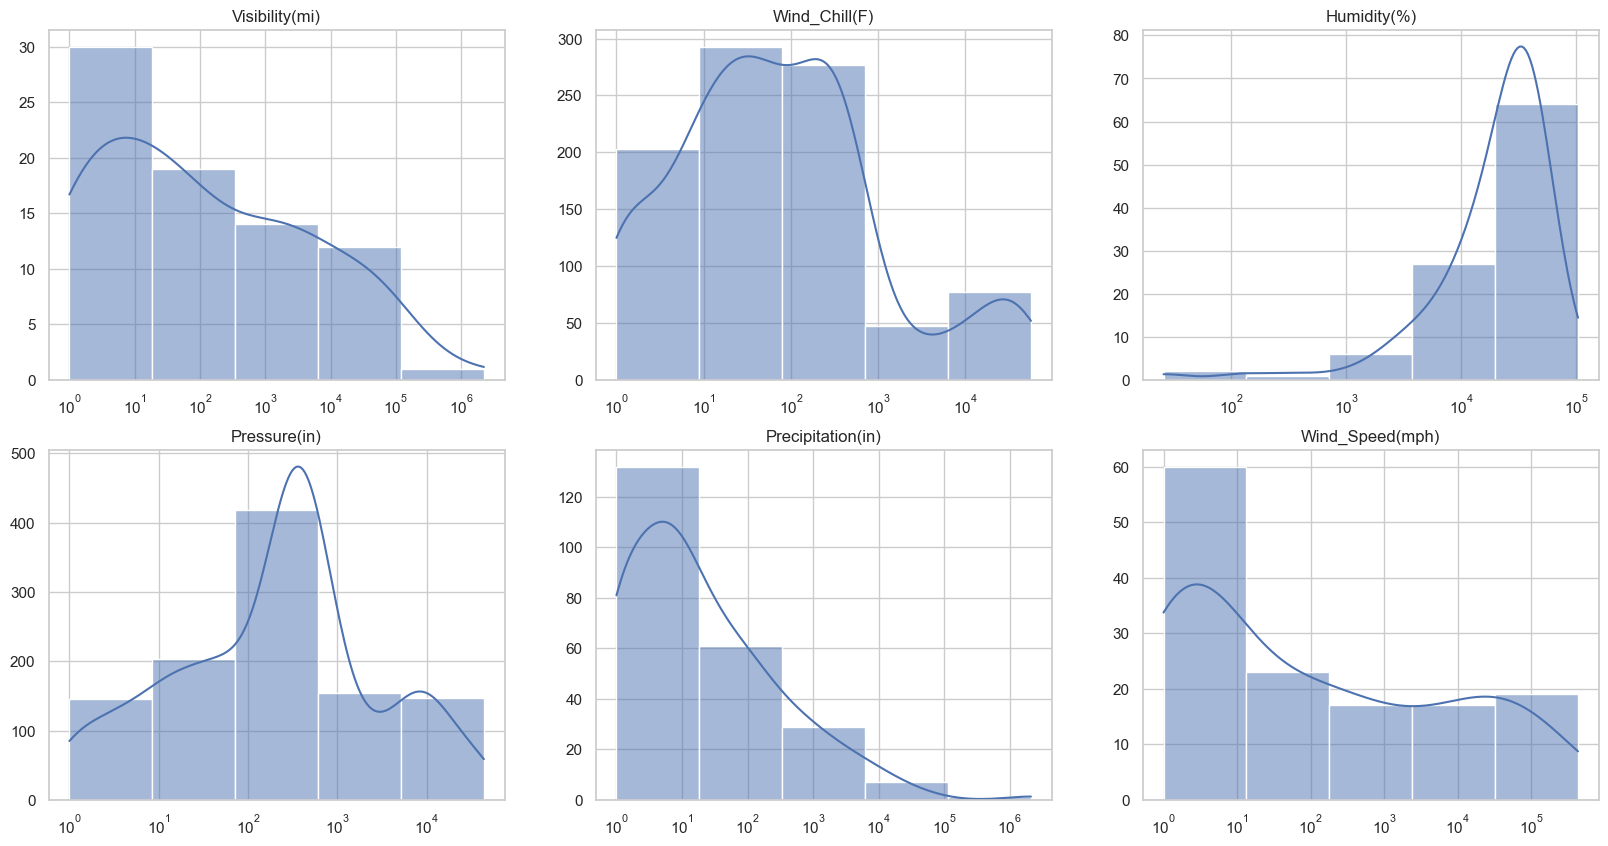

In [120]:
import math
var_lst = ["Visibility(mi)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Precipitation(in)", "Wind_Speed(mph)"]

rows = math.ceil(len(var_lst)/3)
rows

fig, axs = plt.subplots(rows, 3, figsize = (20, 5*rows))

for i, ax in zip(var_lst, axs.flat):
    #g = sns.barplot(data = df, x = i, y = "survived", ax = ax, ci = False)
    g = sns.histplot(df[i].value_counts(), bins= 5, kde=True, log_scale=True, ax=ax)
    ax.set(xlabel = "", ylabel = "", title = i)
    
for i in axs.flat[::-1][:rows*3-len(var_lst)]:
    i.set_axis_off()
plt.show()




/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/anaconda3/lib/python3.9/site-packages/se

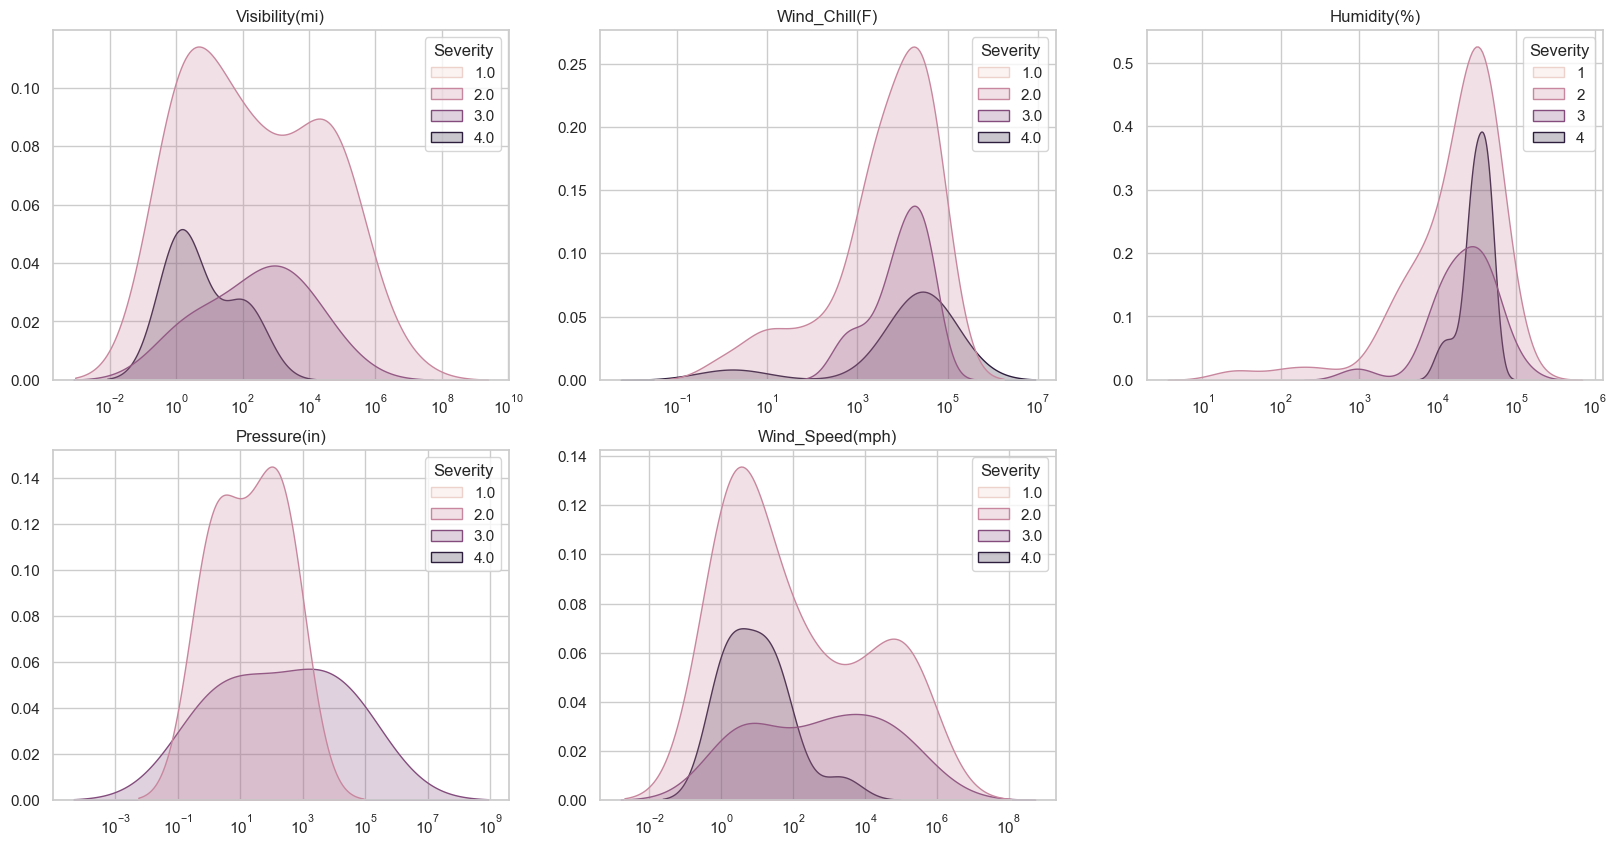

In [118]:
import math

var_lst = ["Visibility(mi)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Wind_Speed(mph)"]

rows = math.ceil(len(var_lst)/3)
rows

fig, axs = plt.subplots(rows, 3, figsize = (20, 5*rows))

for i, ax in zip(var_lst, axs.flat):
    #g = sns.barplot(data = df, x = i, y = "survived", ax = ax, ci = False)
    g = sns.kdeplot(x = df[i].value_counts(), log_scale=True, ax=ax, hue = df["Severity"], fill = True, )
    ax.set(xlabel = "", ylabel = "", title = i)
    
for i in axs.flat[::-1][:rows*3-len(var_lst)]:
    i.set_axis_off()
plt.show()


<AxesSubplot:xlabel='Temperature(F)', ylabel='Wind_Chill(F)'>

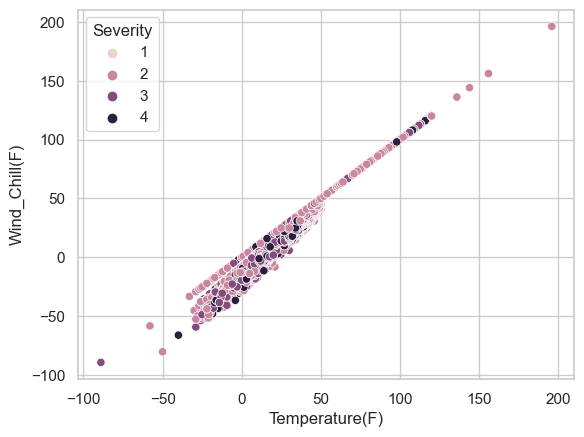

In [111]:
#directly correlated
sns.scatterplot(data = df, x = "Temperature(F)", y ="Wind_Chill(F)", hue = "Severity")

In [115]:
#timezone_acc=df['Timezone'].value_counts()
#timezone_acc.plot(kind = 'pie', autopct='%1.0f%%', title='US Timezone wise accident counts' )


import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


labels = ["US/Eastern", "US/Pacific", "US/Central", "US/Mountain"]
values = df['Timezone'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.write_html("timezone_accidents.html")
fig.show()


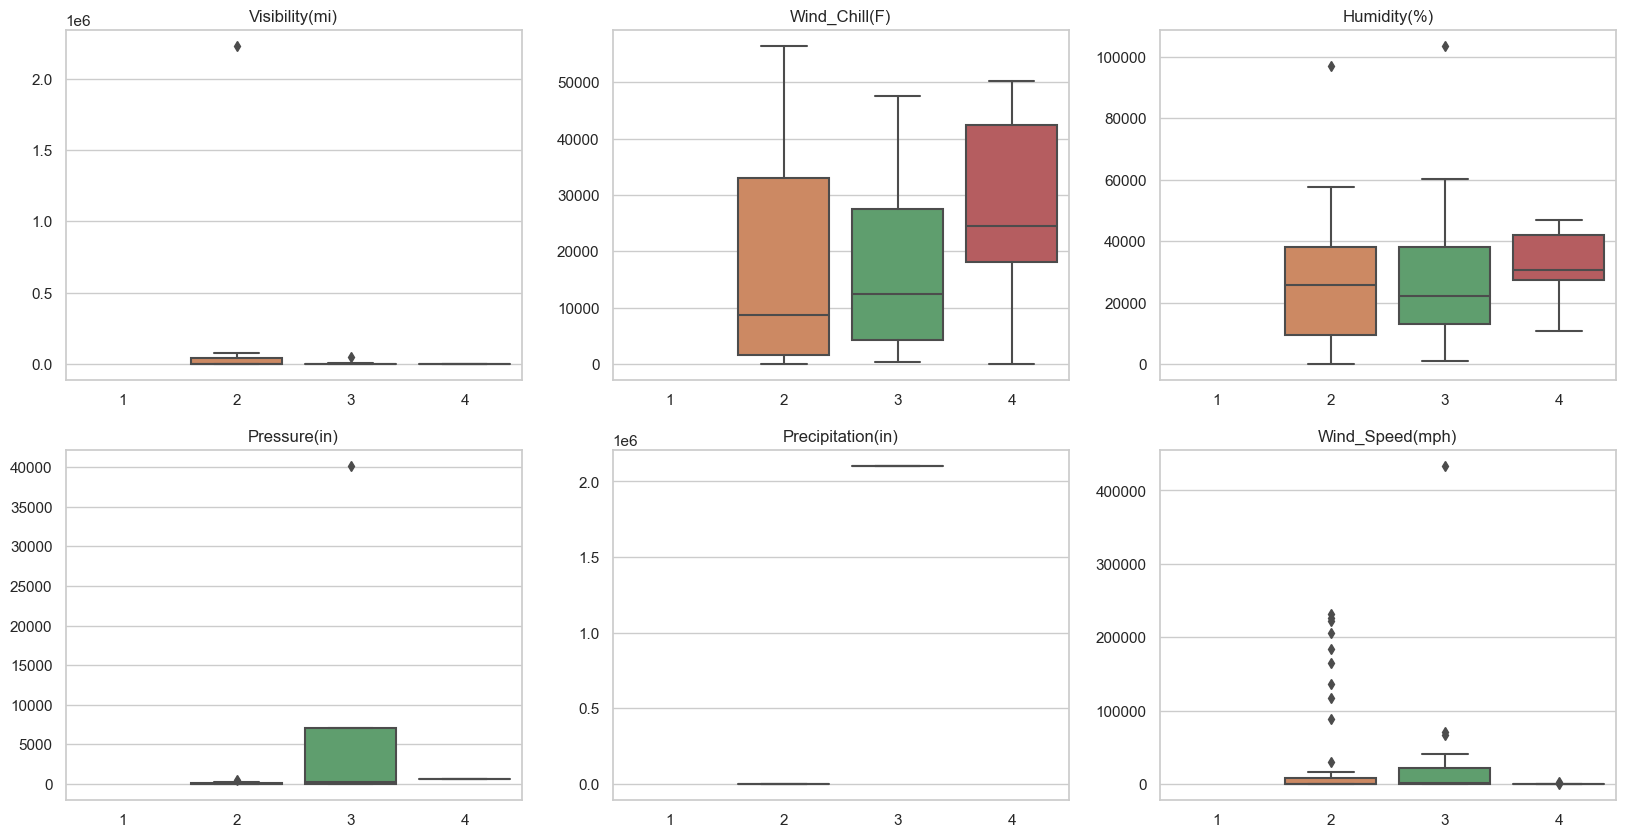

In [117]:
import math

var_lst = ["Visibility(mi)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Precipitation(in)", "Wind_Speed(mph)"]

rows = math.ceil(len(var_lst)/3)
rows

fig, axs = plt.subplots(rows, 3, figsize = (20, 5*rows))

for i, ax in zip(var_lst, axs.flat):
    #g = sns.barplot(data = df, x = i, y = "survived", ax = ax, ci = False)
    g = sns.boxplot(y = df[i].value_counts(),  ax=ax, x = df["Severity"] )
    ax.set(xlabel = "", ylabel = "", title = i)
    
for i in axs.flat[::-1][:rows*3-len(var_lst)]:
    i.set_axis_off()
plt.show()

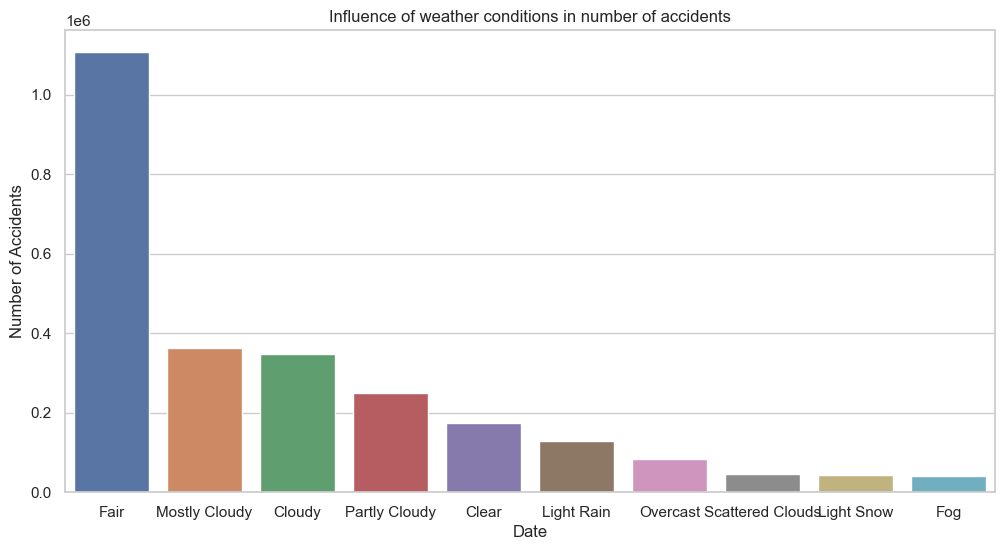

In [116]:
# Create a line plot of the daily accidents
import matplotlib.pyplot as plt
import seaborn as sns
weather = df.Weather_Condition.value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = df, x = weather.index, y = weather.values, ci = False)
ax.set_title('Influence of weather conditions in number of accidents')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.show()


#df.Weather_Condition.value_counts().head(10).plot(kind = 'bar', color = 'yellow')


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

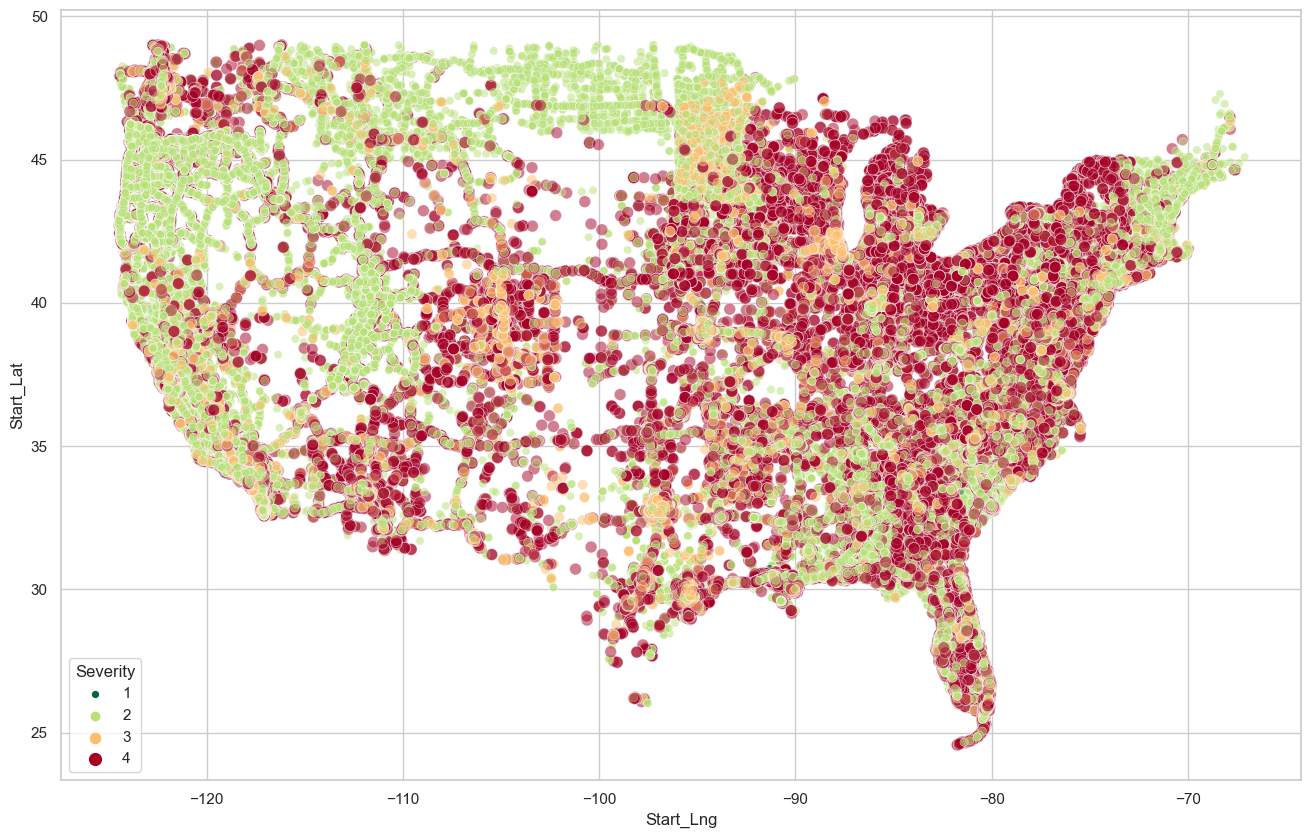

In [114]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, data = df, size = df.Severity, hue = df.Severity, alpha = .5, palette = "RdYlGn_r")

In [ ]:
pip install us_states

In [ ]:
import pandas as pd
import folium

#Filter the data for Washington and fatal accidents
df_az = df[(df.State == 'WA') & (df.Severity == 4)]

# Create a map centered at the median latitude and longitude of the filtered data
map_az = folium.Map(location=[df_az.Start_Lat.median(), df_az.Start_Lng.median()], zoom_start=10)

# Add markers for each fatal accident location
for index, row in df_az.iterrows():
    folium.Marker(location=[row['Start_Lat'], row['Start_Lng']],
                  icon=folium.Icon(color='red')).add_to(map_az)

map_az.get_root().html.add_child(folium.Element("""
<div style = "position:fixed;margin-left:-17px;margin-top:-42px;width:35px;height:45px;transform:translate3d(300px,277px,0px);z-index:277">
<h5>Hej!</h5><br/>
<button>Click me</button>
</div>
    """))
map_az.save("output.html")
# Display the map
map_az


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap


# Create a map centered on the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a heatmap layer based on the latitude and longitude data
heatmap = HeatMap(
    data=df[['Start_Lat', 'Start_Lng']].values,
    name='Traffic Accidents Heatmap',
    control=False,
)

# Add the heatmap layer to the map
heatmap.add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

m.get_root().html.add_child(folium.Element("""
<div style = "transform-origin:50%50%;transform:translate3d(51px,30px,0px)">
<h5>Hej!</h5><br/>
<button>Click me</button>
</div>
    """))
m.save("output_heat.html")


# Display the map
m